In [1]:
%run ../include/oracle.py

01011 is observed 10000 times


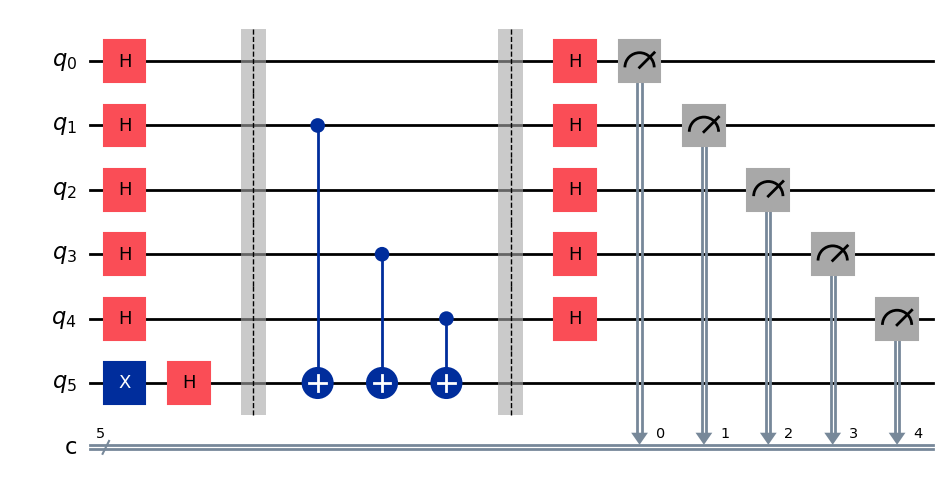

In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

n=5  

#Create quantum circuit
bv_circuit = QuantumCircuit(n+1, n)

#Apply X gate to last qubit
bv_circuit.x(n)

#Apply Hadamard to all qubits
bv_circuit.h(range(n+1))

#Apply oracle
bv_circuit.compose(bv_oracle(), inplace=True)

#Apply Hadamard to all qubits
bv_circuit.h(range(n))

#Measure the first 4 qubits
bv_circuit.measure(range(n), range(n))

job = AerSimulator().run(bv_circuit,shots=10000)
counts = job.result().get_counts()
for outcome in counts:
    reverse_outcome = ''
    for i in outcome:
        reverse_outcome = i + reverse_outcome
    print(reverse_outcome,"is observed",counts[outcome],"times")

#Draw the circuit
bv_circuit.draw(output="mpl")